# Clase 08: Portfolio Management - Gestión de Portafolios de Renta Fija

## Índice
1. Introducción a la gestión de portafolios de renta fija
2. La curva de tasas de interés
3. Estrategias de posicionamiento en la curva de tasas
   - Estrategia Laddered
   - Estrategia Barbell
   - Estrategia Bullet
4. Estrategias de Spread y Swap Spread
5. Análisis matemático de rendimientos y duración
6. Expectativas de cambios en la curva: Steepening y Flattening
7. Modelos Modernos para Optimización
   - Modelo Vasicek (Equilibrio)
8. Implementación de estrategias y gestión activa
9. Casos prácticos



---

## 1. Introducción a la gestión de portafolios de renta fija

La gestión de portafolios de renta fija es un componente esencial en la administración de inversiones. Los instrumentos de renta fija, principalmente bonos, ofrecen flujos de caja predecibles y proporcionan estabilidad a los portafolios diversificados. Sin embargo, maximizar el rendimiento y minimizar el riesgo requiere un enfoque estratégico que considere no solo la selección de bonos individuales, sino también su combinación y posicionamiento respecto a la curva de tasas de interés.

La gestión efectiva de un portafolio de renta fija implica tomar decisiones sobre:

- **Duración**: exposición al riesgo de tasa de interés
- **Calidad crediticia**: balance entre rendimiento y riesgo de default
- **Distribución por Plazos**: posicionamiento en la curva de tasas
- **Diversificación sectorial**: exposición a diferentes industrias y emisores

En esta clase nos enfocaremos en el posicionamiento estratégico en la curva de tasas de interés y las implicaciones matemáticas y financieras de diferentes enfoques.


## 2. La curva de tasas de interés

La curva de tasas de interés, también conocida como la estructura temporal de las tasas de interés (ETTI), representa la relación entre los rendimientos de bonos con la misma calidad crediticia pero con diferentes vencimientos. Normalmente, esta curva tiene pendiente positiva (los bonos a largo plazo ofrecen mayores rendimientos que los de corto plazo) debido a:

- **Prima por riesgo de plazo**: compensación por mayor incertidumbre
- **Prima de liquidez**: los vencimientos más largos suelen ser menos líquidos
- **Expectativas de inflación**: mayor inflación esperada a largo plazo

La forma de la curva puede clasificarse como:
1. **Normal**: pendiente positiva (rendimientos más altos para plazos más largos)
2. **Plana**: rendimientos similares para todos los plazos
3. **Invertida**: pendiente negativa (rendimientos más bajos para plazos más largos)
4. **Jorobada**: rendimientos más altos para plazos intermedios



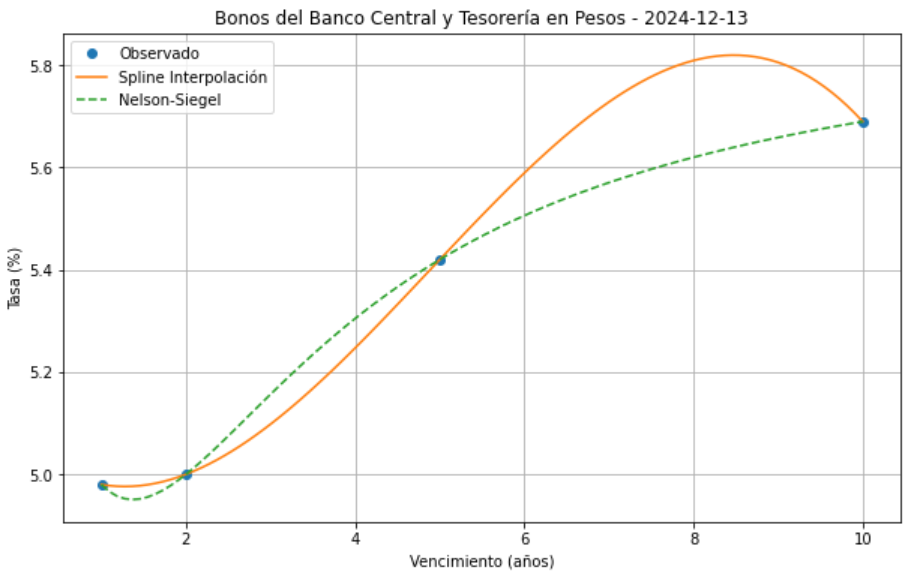


Los movimientos de la curva se clasifican en:
- **Cambios paralelos**: todos los puntos de la curva se mueven en la misma dirección y magnitud
- **Cambios en la pendiente**: 
  - **Steepening** (empinamiento): aumenta la diferencia entre rendimientos de largo y corto plazo
  - **Flattening** (aplanamiento): disminuye la diferencia entre rendimientos de largo y corto plazo
- **Cambios en la curvatura**: afectan principalmente a los rendimientos intermedios

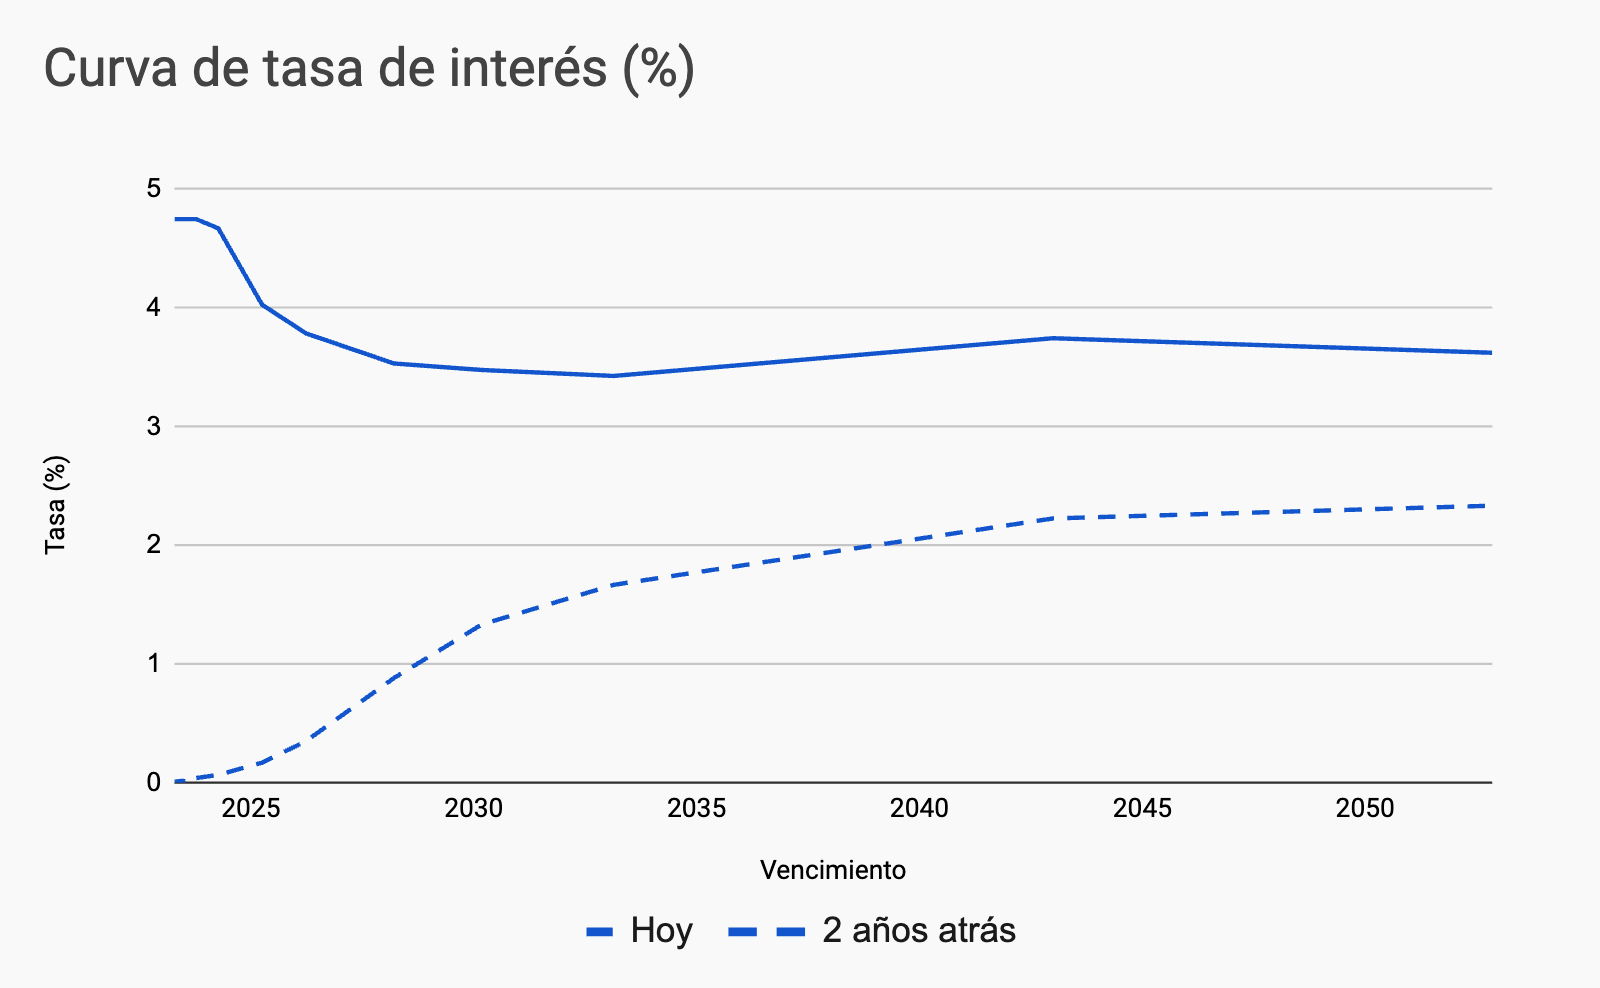


### 2.1. Modelos de Curva: Introducción al Modelo Nelson-Siegel

Para describir cuantitativamente la forma de la curva y sus movimientos, se emplean **modelos paramétricos**. Uno de los más reconocidos es el **Modelo Nelson-Siegel**, propuesto por Charles Nelson y Andrew Siegel (1987), que permite capturar:

1. **Nivel (Level)**: El componente de rendimiento base a lo largo de todos los vencimientos.  
2. **Pendiente (Slope)**: Diferencia entre tasas de corto y largo plazo.  
3. **Curvatura (Curvature)**: Qué tan pronunciada puede ser la joroba en la zona intermedia.

La **función de Nelson-Siegel** modela la tasa para un vencimiento $m$ (en años, por ejemplo) como:

$$
y(m) \;=\; \beta_0 
\;+\; \beta_1 \left(\frac{1 - e^{-\lambda m}}{\lambda m}\right) 
\;+\; \beta_2 \left(\frac{1 - e^{-\lambda m}}{\lambda m} - e^{-\lambda m}\right),
$$

donde:
- $\beta_0$ (componente de **nivel**): Captura el rendimiento promedio o de largo plazo.  
- $\beta_1$ (componente de **pendiente**): Explica cómo cambia la tasa de corto plazo con respecto a la de largo plazo.  
- $\beta_2$ (componente de **curvatura**): Describe la joroba en los vencimientos intermedios.  
- $\lambda$: Parámetro que controla la localización de la máxima curvatura en la curva de tasas.

#### 2.1.1. Interpretación Económica de Nelson-Siegel

- **$\beta_0$** (Level): Se asocia a movimientos paralelos de la curva; un incremento en $\beta_0$ desplaza la curva completa hacia arriba.  
- **$\beta_1$** (Slope): Representa la inclinación corto-largo; un cambio en $\beta_1$ hace que el extremo corto de la curva suba/baje más que el extremo largo, generando steepening o flattening.  
- **$\beta_2$** (Curvature): Permite que la parte intermedia de la curva difiera de los extremos, creando o aplanando “jorobas”.

De esta forma, el modelo **Nelson-Siegel** es capaz de describir la forma de la curva en términos de tres factores principales (nivel, pendiente y curvatura), que suelen corresponderse bastante bien con los **primeros componentes principales** (PCA) de la curva de tasas.

#### 2.1.2. Extensiones: Nelson-Siegel Dinámico

Posteriormente, Diebold y Li (2006) propusieron una versión dinámica del modelo, que hace que los $\beta$ evolucionen en el tiempo, permitiendo que la forma de la curva cambie y se actualice de manera más flexible al incorporar la dimensión temporal:

$$
\begin{cases}
\beta_{0,t}, \;\beta_{1,t}, \;\beta_{2,t} \quad\Rightarrow \text{(estimados en cada periodo }t\text{)},\\
\lambda_t \quad\Rightarrow \text{(parámetro que también puede variar en el tiempo)}.
\end{cases}
$$

Esta evolución temporal facilita el pronóstico de la curva y su uso en estrategias de **gestión de portafolios** o en **valoración de instrumentos**.



## 3. Estrategias de posicionamiento en la curva de tasas



### Estrategia Laddered

La estrategia Laddered consiste en distribuir el capital de manera uniforme entre bonos con vencimientos secuenciales y equidistantes (como los peldaños de una escalera).

**Características principales:**
- **Estructura**: Inversión equitativa en bonos con vencimientos distribuidos regularmente
- **Gestión**: A medida que los bonos vencen, se reinvierten en el extremo más lejano de la "escalera"
- **Ejemplo**: Un ladder de 5 años tendría 20% de la cartera en bonos con vencimiento a 1, 2, 3, 4 y 5 años

**Ventajas:**
- Diversificación temporal que reduce el riesgo de reinversión
- Liquidez estructurada con vencimientos regulares
- Rendimiento promedio cercano al punto medio de la curva
- Sencillez de implementación y mantenimiento

**Desventajas:**
- **Pierde oportunidades de beneficiarse con cambios en la forma de la curva**
- Menor capacidad para expresar visiones direccionales del mercado
- Rendimiento potencialmente inferior en entornos de curva extremadamente empinada o invertida

**Análisis matemático:**
El rendimiento de un portafolio ladder con n bonos de igual peso puede expresarse como:

$$R_{ladder} = \frac{1}{n}\sum_{i=1}^{n}R_i$$

Donde:
- $R_{ladder}$ es el rendimiento del portafolio laddered
- $R_i$ es el rendimiento del bono con vencimiento i

La duración del portafolio sería:

$$D_{ladder} = \frac{1}{n}\sum_{i=1}^{n}D_i$$

Donde $D_i$ es la duración del bono con vencimiento i.


### Estrategia Barbell

La estrategia Barbell concentra la inversión en los extremos de la curva de rendimientos, combinando bonos de corto plazo con bonos de largo plazo, evitando o minimizando la exposición a vencimientos intermedios.

**Características principales:**
- **Estructura**: Concentración en bonos de corto y largo plazo (como las pesas en una barra)
- **Distribución**: Típicamente 40-60% en corto plazo y 40-60% en largo plazo
- **Ejemplo**: 50% en bonos de 1-2 años y 50% en bonos de 10+ años

**Ventajas:**
- Mayor liquidez en la parte corta del portafolio
- Rendimiento potencial más alto si la curva se aplana
- Flexibilidad para rebalancear en respuesta a cambios en las tasas

**Desventajas:**
- Mayor sensibilidad a cambios en la forma de la curva
- Potencialmente mayor volatilidad que un portafolio bullet
- Puede tener menor rendimiento si la curva se empina

**Cuándo funciona mejor:**
- **Generalmente funciona mejor cuando esperamos un aplanamiento de la curva**
- **Ajustes a la baja en las tasas largas tienen mejor efecto en el rendimiento**
- Entornos de alta volatilidad donde se valora tener una parte significativa del portafolio en instrumentos líquidos de corto plazo

**Análisis matemático:**
Para un barbell simple con proporción α en corto plazo y (1-α) en largo plazo:

$$R_{barbell} = \alpha \cdot R_{corto} + (1-\alpha) \cdot R_{largo}$$

La duración del portafolio barbell sería:

$$D_{barbell} = \alpha \cdot D_{corto} + (1-\alpha) \cdot D_{largo}$$

**Convexidad:**
La estrategia barbell generalmente tiene mayor convexidad que una estrategia bullet con duración similar:

$$C_{barbell} = \alpha \cdot C_{corto} + (1-\alpha) \cdot C_{largo} > C_{bullet}$$

Esta mayor convexidad proporciona una ventaja cuando hay cambios paralelos grandes en la curva de rendimientos.



### Estrategia Bullet

La estrategia Bullet concentra la inversión en un rango estrecho de vencimientos, típicamente en la parte media de la curva de rendimientos.

**Características principales:**
- **Estructura**: Concentración en bonos con vencimientos similares
- **Distribución**: Mayoría del capital en un punto específico de la curva
- **Ejemplo**: 80% en bonos de 5-7 años

**Ventajas:**
- Permite posicionarse precisamente en el punto de la curva con mejor relación riesgo/rendimiento
- Simplifica la gestión del portafolio
- Reduce la dispersión de vencimientos

**Desventajas:**
- Menor diversificación temporal
- Mayor riesgo de reinversión concentrado
- Menor capacidad para adaptarse a movimientos paralelos de la curva

**Cuándo funciona mejor:**
- **Generalmente funciona mejor cuando esperamos un empinamiento de la curva**
- **Cuando los plazos intermedios tienen mejores rendimientos ajustados por riesgo**
- En curvas con "joroba" donde los vencimientos intermedios ofrecen mayor rendimiento

**Análisis matemático:**
Para un portafolio bullet con vencimientos concentrados alrededor de un punto t:

$$R_{bullet} = \sum_{i} w_i \cdot R_i \quad \text{donde} \sum_{i} w_i = 1 \text{ y } i \approx t$$

Donde:
- $w_i$ es el peso del bono con vencimiento cercano a t
- $R_i$ es el rendimiento de ese bono

La duración del portafolio:

$$D_{bullet} = \sum_{i} w_i \cdot D_i$$

La convexidad de un portafolio bullet suele ser menor que la de un barbell con duración equivalente.


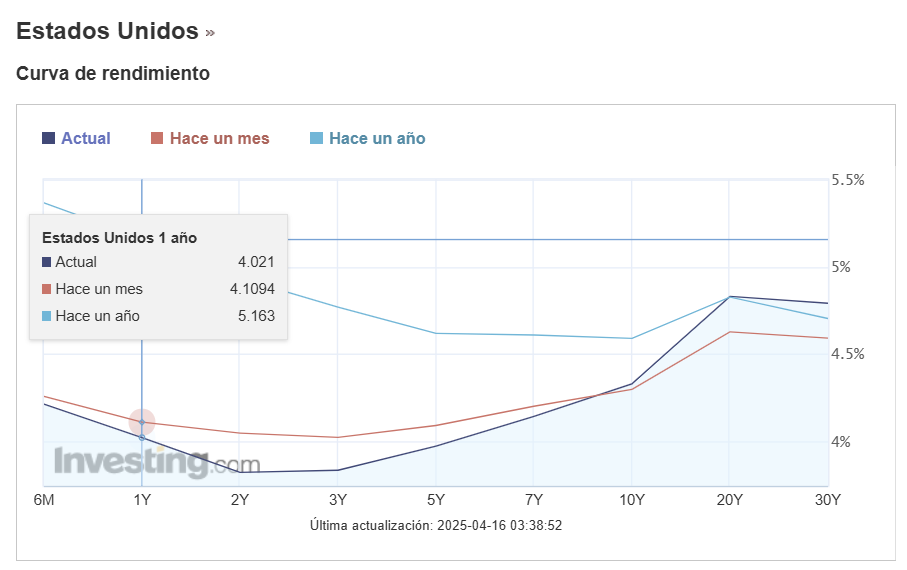


## 4. Expectativas de cambios en la curva: Steepening y Flattening

### Steepening (Empinamiento)

$$
(\Delta y_{\text{largo}} - \Delta y_{\text{corto}}) > 0
$$

- **Bull Steepening**: Tasas cortas bajan más rápidamente que las largas.  
- **Bear Steepening**: Tasas largas suben más rápidamente que las cortas.

### Flattening (Aplanamiento)

$$
(\Delta y_{\text{largo}} - \Delta y_{\text{corto}}) < 0
$$

- **Bull Flattening**: Tasas largas caen más que las cortas.  
- **Bear Flattening**: Tasas cortas suben más que las largas.

**Tabla de referencia**:

| Movimiento           | Definición                      | Tasas Cortas   | Tasas Largas   | Estrategia Óptima                   |
|----------------------|---------------------------------|----------------|----------------|--------------------------------------|
| **Bull Flattening**  | Aplanamiento en mercado “bull”  | ↓ (bajan)      | ↓↓ (bajan más) | **Barbell** (mayor exposición largo) |
| **Bear Flattening**  | Aplanamiento en mercado “bear”  | ↑↑ (suben más) | ↑ (suben)      | Barbell/corto defensivo             |
| **Bull Steepening**  | Empinamiento en mercado “bull”  | ↓↓ (bajan más) | ↓ (bajan)      | **Bullet** (tramo intermedio)        |
| **Bear Steepening**  | Empinamiento en mercado “bear”  | ↑ (suben)      | ↑↑ (suben más) | **Bullet** (acortar duración)        |



## 6. Estrategias de Spread

### 6.1. Estrategias de Spread Bonds

El objetivo es capturar el diferencial de rendimiento entre bonos corporativos y bonos soberanos (o entre emisores con diferente calidad crediticia) con duraciones similares.

$$
\text{Spread} 
= y_{\text{corp}} - y_{\text{gov}}
$$

donde:
- $y_{\text{corp}}$: rendimiento bono corporativo.
- $y_{\text{gov}}$: rendimiento bono soberano (riesgo “casi” nulo).

**Prima adicional**:  
$$
\text{Spread} 
= \text{Riesgo de crédito} + \dots \text{Prima de liquidez} \dots + \text{Prima de opción} 
$$

### 6.2. Estrategias de Swap Spread

Diferencial entre la tasa fija de un **interest rate swap (IRS)** y la tasa soberana equivalente en plazo:

$$
\text{Swap Spread}
= \text{Swap Rate} - \text{Rendimiento Soberano}
$$

- **Widening** (Ampliación):  
  - Operación típica: *Pagar tasa fija* en el swap + *Comprar* el bono soberano.  
  - Gana si el swap spread aumenta.  

- **Tightening** (Estrechamiento):  
  - Operación típica: *Recibir tasa fija* en el swap + *Vender (short)* el bono soberano.  
  - Gana si el swap spread disminuye.



#### Estrategias de Swap Spread

El swap spread representa la diferencia entre la tasa fija de un interest rate swap (IRS) y el rendimiento de un bono soberano con el mismo vencimiento.

**Definición matemática:**
$$Swap\ Spread = Swap\ Rate - Treasury\ Yield$$

**Factores que afectan el swap spread:**
- Oferta y demanda de swaps
- Percepción de riesgo de contraparte en el sistema bancario
- Oferta relativa de bonos soberanos
- Preferencias de los inversores institucionales

**Implementación de estrategias:**

1. **Swap Spread Widening (ampliación):**
   - **Posición**: Pagar tasa fija en IRS + comprar bonos soberanos
   - **Razonamiento matemático**: Si el swap spread aumenta, la ganancia en el bono compensa la pérdida en el pago de tasa fija
   - **Escenarios favorables**: Crisis de liquidez, estrés en sistema bancario, reducción oferta soberanos

2. **Swap Spread Tightening (estrechamiento):**
   - **Posición**: Recibir tasa fija en IRS + vender bonos soberanos
   - **Razonamiento matemático**: Si el swap spread disminuye, la ganancia por recibir tasa fija supera la pérdida en los bonos
   - **Escenarios favorables**: Mejora condiciones crediticias bancarias, aumento oferta soberanos

**Tabla: Estrategias de Swap Spread y Escenarios Económicos**

| Estrategia | Posición | Escenario Económico | Expectativa | Implementación | Métricas de Seguimiento |
|------------|----------|---------------------|-------------|----------------|-------------------------|
| Widening | Long Soberanos + Pagar Fijo en Swap | Crisis financiera | Aumento spread swap | DV01 neutralizado | LIBOR-OIS, TED Spread |
| Tightening | Short Soberanos + Recibir Fijo en Swap | Estabilización | Disminución spread swap | Ajuste por convexidad | Niveles CDS bancarios |
| Curve Swap | Recibir 10Y + Pagar 2Y | Aplanamiento | Disminución pendiente swap | Exposición neutral a paralelos | 2s10s en swaps vs. soberanos |
| Basis Swap | LIBOR 3M vs. LIBOR 6M | Tensión fondeo | Ampliación basis | Exposición neutral direccional | Volatilidad LIBOR |

**Consideraciones matemáticas en implementación:**
- **DV01 Matching**: Igualar la sensibilidad a movimientos de tasa entre swap y bono
$$DV01_{Bond} \approx DV01_{Swap}$$

- **Ajuste por convexidad**: Los bonos tienen convexidad positiva, los swaps tienen convexidad cercana a cero
$$Value\ Adjustment = \frac{1}{2} \cdot Convexity \cdot (\Delta y)^2 \cdot Notional$$

- **Análisis de escenarios**: Modelar comportamiento bajo diferentes magnitudes de cambio en swap spread
$$P\&L = Notional \cdot (Change\ in\ Swap\ Spread) \cdot DV01$$

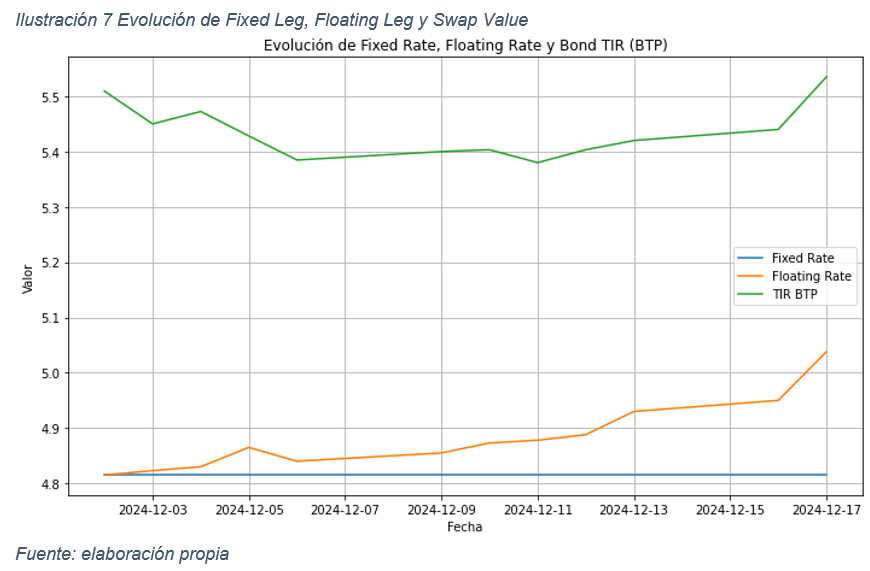

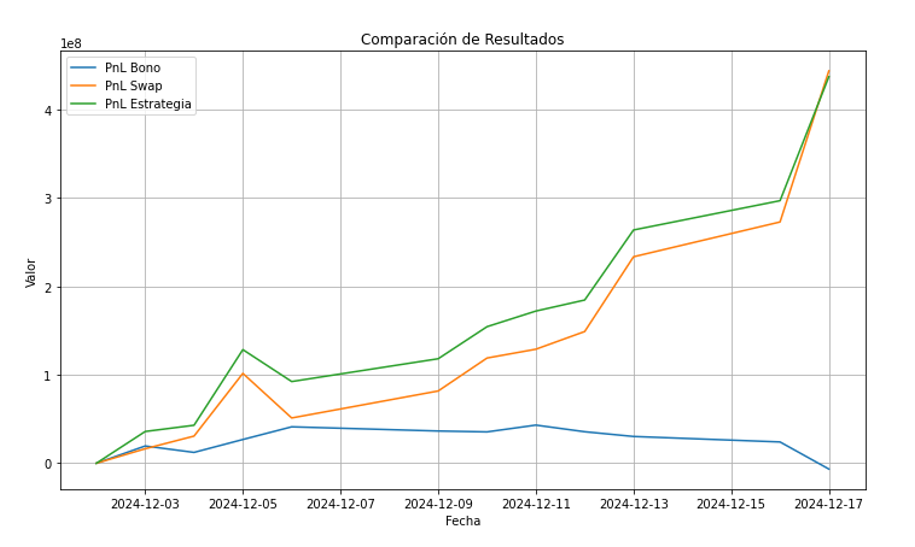

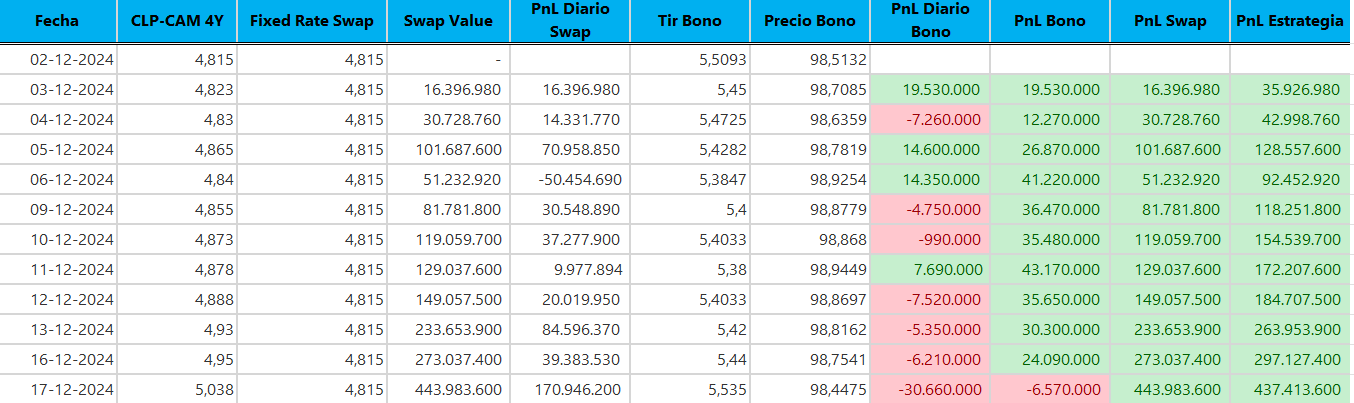


### 6.2 Estrategias de **Spread Basis**

Los **basis spreads** surgen cuando existen diferencias entre dos tasas de referencia que, en teoría, deberían moverse de manera cercana o correlacionada. El caso más típico es el **basis** entre distintas referencias de LIBOR (ej. 3M vs. 6M), entre LIBOR y otras tasas de fondeo (OIS, EURIBOR) o **cross-currency basis** entre distintas monedas.

### Concepto de “Basis Spread”

Si consideramos dos tasas de interés $R_1$ y $R_2$ con vencimiento similar pero definidas sobre distintos mercados/referencias, el **Basis** (o *basis spread*) se define como:

$$
\text{Basis} 
= R_1 - R_2.
$$

Ejemplo:  
- **3M LIBOR vs. 6M LIBOR**:  
  $$
  \text{Basis}_{3m-6m} 
  = \text{LIBOR}_{3m} - \text{LIBOR}_{6m}.
  $$  
- **Cross-currency basis**:  
  $$
  \text{Basis}_{\text{USD/EUR}} 
  = \text{Swap Rate}_{\text{USD}} - \text{Swap Rate}_{\text{EUR}} \, (\text{ajustada por tipo de cambio}).
  $$

### Estrategias Típicas en “Basis”

1. **Basis Widening** (ensanchamiento):
   - Tomar posición larga en el activo/subyacente que se espera suba más su tasa y posición corta en el que se espera suba menos.  
   - Se busca un aumento del diferencial.

2. **Basis Tightening** (estrechamiento):
   - Posición contraria: vender el activo con tasa “cara” y comprar el con tasa “barata”, esperando que el diferencial disminuya.

3. **Cross-currency Basis Swap**:
   - Intercambiar flujos en distintas monedas pagando la tasa de una y recibiendo la tasa de otra, ajustadas por el *basis spread*.  
   - Se monetiza si el spread converge al esperado “fair value”.

### Representación Matemática Simplificada

Sea un *notional* $N$ y supongamos que invertimos en un swap que intercambia:
- **Recibir**: $R_1$ (por ejemplo, LIBOR 6M).  
- **Pagar**: $R_2$ (por ejemplo, LIBOR 3M + X bps).  

El *basis* es la prima $X$ que equilibra el swap:

$$
X 
= (R_1 - R_2).
$$

Si esperamos que $R_1$ suba más que $R_2$, o que el *basis* se amplíe, nos conviene recibir $R_1$ y pagar $R_2$. El P&L aproximado a corto plazo se estima por sensibilidad:

$$
\Delta P 
\approx DV01_{\text{swap}} \times \Delta(\text{Basis}).
$$

- **DV01**: Sensibilidad del precio del swap a cambios de 1 punto base en la tasa o en el basis.

### Factores que afectan el Basis

- **Liquidez** en cada mercado.  
- **Riesgo de contraparte** y regulación bancaria.  
- **Políticas monetarias** divergentes (sobre todo en cross-currency).  
- **Oferta y demanda** de instrumentos de cobertura en diferentes plazos.



# Conclusiones Generales

1. **Curva Completa**:  
   - Para “montar” una curva *upward*, comprar bonos un poco más largos que el horizonte y beneficiarse del roll-down.  
   - En escenarios bajistas (subida de tasas), acortar duración o cubrirse.  
   - Elegir *Barbell* o *Bullet* según se prevea flattening o steepening.

2. **Comparación 3M-6M**:  
   - Ofrece una **estrategia táctica** de corto plazo para explotar el **spread** entre plazos del mismo instrumento como 3M y 6M.  
   - Ajustando nocionales para emparejar duración, se concentra la apuesta en la **evolución relativa** de esos dos puntos de la curva, lo que puede maximizar la rentabilidad con un riesgo de tasa direccional más reducido.

3. **MtM y Duración**:  
   - La duración neta se controla equilibrando notionales, de modo que un movimiento paralelo de tasas afecte poco.  
   - El **Mark-to-Market** diario mostrará la ganancia/pérdida real, la cual se explicará casi en su totalidad por cambios en el **spread 3M-6M** (o *basis*), no por la dirección de la curva en general.

4. **Maximización de Rendimiento**:  
   - Al “montar la curva” en el tramo deseado, se obtiene no solo el cupón (o tasa implícita), sino también la potencial apreciación por el cambio de precio en la medida que se reduce la vida del bono (roll-down) o converge el spread esperado.  
   - En el caso 3M-6M, se puede lograr un alto **rendimiento ajustado por riesgo** al capturar discrepancias de corto plazo en la curva, siempre que la estrategia y el hedge ratio se implementen cuidadosamente en base a análisis fundamentado.
